# Chapter 9: Portfolio Theory

Understanding portfolio theory is very important in learning finance. It is well
known that don't put all your eggs in one basket, that is, it is a great idea to diversify
away your risk. However, very few know the implied assumption behind such a
famous idiom. In this chapter, we will discuss various risk measures for individual
stocks or portfolios, such as Sharpe ratio, Treynor ratio, Sortino ratio, how to
minimize portfolio risk based on those measures (ratios), how to set up an objective
function, how to choose an efficient portfolio for a given set of stocks, and how to
construct an efficient frontier. Our focus is on how to apply portfolio theory by using
real-world data. For instance, today we have $2 million cash and plan to purchase
IBM and Walmart stocks. If we have 30% invested in the first one and the rest in the
second, what is our portfolio risk? What is the least risky portfolio that we could
form based on those two stocks? How about 10 or 500 stocks? In this chapter, the
following topics will be covered:

• Introduction to portfolio theory

• A 2-stock portfolio

• N-stock portfolio

• Correlation versus diversification effect

• Producing a return matrix

• Generating an optimal portfolio based on Sharpe ratio, Treynor ratio, and
Sortinor ratio

• Constructing an efficient frontier

• Modigliani and Modigliani performance measure (M2 measure)

## Intro to Portfolio Theory

The keyword for the portfolio theory is diversification, while the keyword for
diversification is correlation. In other words, correlation is used to measure how
closely two stocks or portfolios are moving together. The objective of portfolio
theory is to allocate our assets optimally with respect to risk and return. Markowitz
(1952) argues that we should consider only the first two moments of a security's
return distribution: mean and variance. For financial markets, several important
assumptions are made, such as stock markets are inefficient, a typical investor is
rational, and an arbitrage opportunity would not last long. For the preferences
between two stocks, for a given risk, a rational investor would prefer stock with
a higher expected return; for a given return, a rational investor prefers stock with
a lower risk level. Sometimes, a single period portfolio optimization is called
Markowitz Portfolio Optimization. The input includes a return matrix, and a variance
and covariance matrix, while the output is an efficient portfolio. By connecting
numerous efficient portfolios, an efficient frontier is formed. Here, we start with the
simplest scenario: a two-stock portfolio.

## Two Stock Portfolio

The rest of the notes are on google docs - this is simply for analyzing results. Assume that the volatilities (standard deviations) of two stocks are 0.06 and 0.24 and they are perfectively negatively correlated. What are two weights in order to form a
zero-risk portfolio? There exist several methods to find a solution.

Method 1: we could manually find a solution: plug in given values into Equation (3)
and set it equal to zero where x=x1 and x2=1-x:

In [2]:
import scipy as sp
import numpy as np
a=1
b=6
c=3
inside=b**2-4*a*c
if inside>0:
    squared=np.sqrt(inside)
print("x1=",(b+squared)/(2*a))
print("x2=",(b-squared)/(2*a))

x1= 5.449489742783178
x2= 0.5505102572168221


Method 2: For a given pair of standard deviations (or a pair of variances) plus a
correlation between those two stocks, we generate many weights for stock 1, such as
0, 0.001, 0.002, 0.003, and the like. Remember that w2=1-w1. By applying Equation (3),
we estimate the variances of this 2-stock portfolio. Our final solution will be the pair
of w1 and w2 achieving the minimum portfolio variance, see the following code:

In [4]:
sigma1=0.06
sigma2=0.24
var1=sigma1**2
var2=sigma2**2
rho=-1
n=1000
portVar=10 # assign a big number
tiny=1.0/n # start by assigning a weight of 0.001 to stock 1, gradually increase

for i in np.arange(n):
    w1=i*tiny
    w2=1-w1
    var= w1**2*var1 +w2**2*var2+2*w1*w2*rho*sigma1*sigma2
    if(var<portVar):
        portVar=var
        finalW1=w1
#print(vol)
print("min vol=",np.sqrt(portVar), "w1=",finalW1)


min vol= 9.313225746154785e-10 w1= 0.8


First, the result confirms our previous result with w1=0.8 and w2=0.2. In the
program, we have 1000 pairs of w1 and w2. A small value, called tiny, is
1/1000=0.001. The first pair of two weights is 0.1% and 99.9%. A very big number
is assigned to our solution variable, that is, as an initial value. In this program,
portVar=10. Other big numbers would work perfectly, such as 100. Here is the logic:
based on the first pair of w1 and w2, we estimate the portfolio variance. If this new
portfolio variance is less than portVar, we replace portVar with this new value
and record w1 as well. If the new portfolio variance is bigger than portVar, we do
nothing. Repeat the same procedure until we finish the loop. Here is an analogy.
Assume that we want to find the tallest person among 1,000 persons. Assume that
we have a variable call tallestPerson and its initial vale is 0.1 inch. Since every
person will be taller than this value, the first person's height will replace this value. If
the next person's height is higher than this variable, we replace it. Otherwise, we go
to the next one. The procedure is repeated until the last person. In terms of efficiency,
one small trick is to estimate var1 and var2 just once.

In finance, it is a convention to use both variance and standard deviation to represent
risk, since they describe uncertainty. Usually, we use standard deviation of returns
to represent the volatility. It is a good idea to look at the impact of correlation on
the efficient frontier.

In [6]:

np.random.seed(123)
n=1000
rho=0.3
x1=np.random.normal(size=n)
x2=np.random.normal(size=n)
y1=x1
y2=rho*x1+np.sqrt(1-rho**2)*x2
print(np.corrcoef(y1,y2))

[[1.         0.28505213]
 [0.28505213 1.        ]]


## Optimization – minimization

Before discussing how to generate an optimal portfolio, it is necessary to study a
few optimization functions. In the following example, we minimize our objective
function of y:

y = 3.2 + 5 x^2

First we wil display the graph.

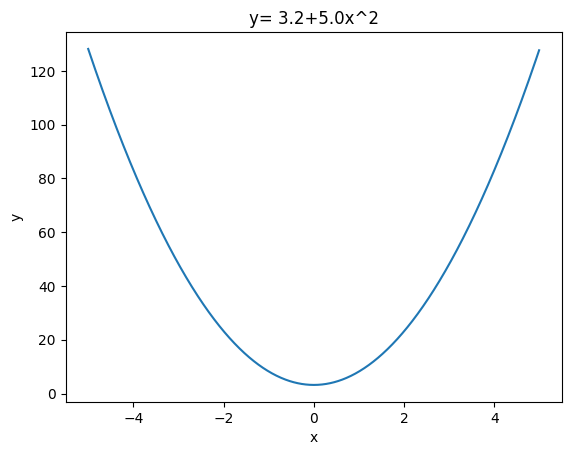

In [7]:
import matplotlib.pyplot as plt
x=np.arange(-5,5,0.01)
a=3.2
b=5.0
y=a+b*x**2
plt.plot(x,y)
plt.title("y= "+str(a)+"+"+str(b)+"x^2")
plt.ylabel("y")
plt.xlabel("x")
plt.show()

To make the program more general, two coefficients of a and b are generated.
Apparently, since the power of x is 2, y is minimized only when x is 0. The Python
code for minimization is as follows:

In [10]:
from scipy.optimize import minimize
def myFunction(x):
    return (3.2+5*x**2)
x0=100
res = minimize(myFunction,x0,method='nelder-mead',options={'xtol':1e8,'disp': True})


Optimization terminated successfully.
         Current function value: 3.200000
         Iterations: 24
         Function evaluations: 48


/var/folders/k4/npf5jb1d4x13y6z87pdgxb9m0000gp/T/ipykernel_8955/1904061227.py:5: OptimizeWarning: Unknown solver options: xtol
  res = minimize(myFunction,x0,method='nelder-mead',options={'xtol':1e8,'disp': True})


The output shows that the function value is 3.2, and it is achieved by assigning 0 to x.

In the preceding program, the major function used is called the scipy.optimize.
minimize() function. The first input is our objective function. In this case, it is our y
function. The second value is our input value, that is, initial value. Since there is only
one independent variable of x for the y function, x0 is a scalar. For the third input
value, method, we have several choices: NelderMead. This algorithm is robust in many applications.
However, if numerical computation of derivative can be trusted, other
algorithms using the first and/or second derivatives information might be
preferred for their better performance in general.

The next example is using the scipy.optimize.brent() function on an exponential
function minimization, see the code followed by the objective function:

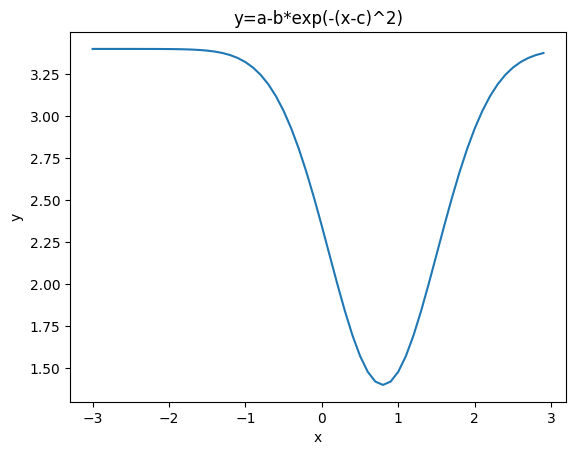

In [11]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
# define a function
a=3.4
b=2.0
c=0.8
def f(x):
    return a-b*np.exp(-(x - c)**2)
x=np.arange(-3,3,0.1)
y=f(x)
plt.title("y=a-b*exp(-(x-c)^2)")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.show()

In [12]:
# find the minimum
solution= optimize.brent(f)
print(solution)

0.7999999995280379


In economics and finance, there is an important concept called utility. One of the
major reasons to design such a concept is that for many situations, we could not
quantify certain effects, such as happiness, willingness, risk preference, wellness,
emotion, and the like. For example, your boss asks you to work extra hours on
Friday and promises you a bonus. Assume that its value is x dollar per hour and
you are happy with it. If the task is urgent, your boss might ask for more hours.
Assume that you have to work on Saturday. Do you think the same x dollar per
hour would make your happy? For most workers the extra bonus should be higher
than x since they would think that they have sacrificed more now than just a Friday
evening. Usually, a utility function could be defined as the different between benefits
and costs. The marginal benefit is a decreasing function of our input. It means the
extra dollar received is not as valuable of the previous dollar. On the other hand,
the marginal cost will be an increasing function of your input. When you asked to
contribute extra work, the appropriate monetary incentive would go higher. 

Consider the utility function:
U = E(R) - 1/2*(A)*σ^2

Here, U is the utility function, E(R) is the expected portfolio return and we could
use its mean to approximate, A is the risk-averse coefficient, and σ2 is the variance
of the portfolio. When the expected return is higher, our utility is higher. The
opposite is true: when the risk of our portfolio is higher the utility is lower. The key
is A, which represents the risk-tolerance. With the same expected return and risk
level, a more risk-reverse investor (a higher A) would experience a lower utility.
Generally speaking, the objective is to balance the benefits (expected returns) with
risk (variance).

Assume that we have a set of stocks, such as International Business Machine (IBM),
Walmart (WMT), and Citi Group (C). Based on the preceding utility function, which
stock should we choose for different given risk preference? The code is given here:

In [15]:
import yfinance as yf
import datetime
import numpy as np
import pandas as pd
import scipy as sp
tickers=('IBM','WMT','C') # tickers
begdate=datetime.date(2012,1,1) # beginning date
enddate=datetime.date(2016,12,31) # ending date
n=len(tickers) # number of observations

A=1 # risk preference

def ret_f(ticker,begdate,enddte):
    x=yf.download(ticker,start = begdate,end = enddate,rounding = True)
    ret = x['Adj Close'].pct_change().dropna()
    return ret

def myUtilityFunction(ret,A=1):
    meanDaily=np.mean(ret)
    varDaily=np.var(ret)
    meanAnnual=(1+meanDaily)**252
    varAnnual=varDaily*252
    return meanAnnual- 0.5*A*varAnnual

for i in np.arange(n):
    ret=ret_f(tickers[i],begdate,enddate)
    print("Ticker: ", tickers[i])
    print(myUtilityFunction(ret,A))

[*********************100%***********************]  1 of 1 completed
Ticker:  IBM
1.0031240025057797
[*********************100%***********************]  1 of 1 completed
Ticker:  WMT
1.0555563200024747
[*********************100%***********************]  1 of 1 completed
Ticker:  C
1.170674702632156


In the preceding program, the mean and standard deviation are both annualized.
The value of 252 represents the number of trading days per year. The time period
used is from 1/1/2012 to 12/31/2016, that is, a five-year period. The output is shown
here. 

Assuming high risk tolerance - A = 1, the following holds. Based on the concept of utility, investors prefer stock with the highest utility - hence in this case would choose "C" (Citi Group).

On the other hand, if A=10 (very risk averse), walmart is preferable.

The result suggests that such an investor should choose the second stock, that is,
Walmart as our sole investment. This is consistent with our common sense, see their
corresponding mean returns and risk levels:

In [19]:
import pandas as pd

tickers=('IBM','WMT','C') # tickers
begdate=datetime.date(2012,1,1) # beginning date
enddate=datetime.date(2016,12,31) # ending date
n=len(tickers) # number of observations

def ret_f(ticker,begdate,enddte):
    x=yf.download(ticker,start=begdate,end=enddate,rounding = True)
    ret =x['Adj Close'].pct_change().dropna()
    return ret
def meanVarAnnual(ret):
    meanDaily=np.mean(ret)
    varDaily=np.var(ret)
    meanAnnual=(1+meanDaily)**252
    varAnnual=varDaily*252
    return meanAnnual, varAnnual

print("meanAnnual,          varAnnual")
for i in np.arange(n):
    ret=ret_f(tickers[i],begdate,enddate)
    print("Ticker: ", tickers[i])
    print(meanVarAnnual(ret))

meanAnnual,          varAnnual
[*********************100%***********************]  1 of 1 completed
Ticker:  IBM
(1.0205216592355038, 0.03479530133262793)
[*********************100%***********************]  1 of 1 completed
Ticker:  WMT
(1.0694834598217988, 0.02785408270981537)
[*********************100%***********************]  1 of 1 completed
Ticker:  C
(1.208615748557031, 0.07588173558466693)


In the preceding program, a function called meanVarAnnual() is generated that
delivers annualized mean return and annualized volatility. Let's compare the last
two stocks. The second stock is less risky than the third one at the same time; it
has a higher risk than the third stock. The mean annual return of the second stock
decreases by 12%, however, its variance decreases by 63%. The consequence is that
utility increased.

For portfolio optimization, or Markowitz Portfolio Optimization, our input datasets
include: expected returns, standard deviations, and correlation matrix. The output
will be an optimal portfolio. By connecting those efficient portfolios, an efficient
frontier could be constructed. In the rest of this chapter, we use historical returns
to represent expected returns and use the historical correlation in the place of
expected correlation.

# Forming an N-stock portfolio

The code below demonstrates one possible approach to the matter

In [37]:
import numpy as np
import pandas as pd
tickers=['IBM','dell','WMT']
market = "^GSPC"

begdate = datetime.date(1988,1,1)
enddate = datetime.date.today()

final = yf.download(market, start = begdate, end = enddate, rounding = True)
final = pd.DataFrame(final['Adj Close']).rename(columns = {'Adj Close':market})

for ticker in tickers:
    print(ticker)
    x = yf.download(ticker, start = begdate, end = enddate, rounding = True)
    x = pd.DataFrame(x['Adj Close']).rename(columns = {'Adj Close':ticker})
    final = pd.merge(final, x, left_index = True, right_index = True)

final.head()

[*********************100%***********************]  1 of 1 completed
IBM
[*********************100%***********************]  1 of 1 completed
dell
[*********************100%***********************]  1 of 1 completed
WMT
[*********************100%***********************]  1 of 1 completed


,^GSPC,IBM,dell,WMT
Date,,,,
2016-08-17,2182.22,108.70,11.39,15.73
2016-08-18,2187.02,109.33,11.32,16.02
2016-08-19,2183.87,108.43,11.52,15.70
2016-08-22,2182.64,108.41,11.56,15.68
2016-08-23,2186.90,108.58,11.92,15.52


In [38]:
final.tail()

,^GSPC,IBM,dell,WMT
Date,,,,
2024-02-16,5005.57,187.64,84.21,56.79
2024-02-20,4975.51,183.44,82.46,58.62
2024-02-21,4981.80,179.70,81.39,57.90
2024-02-22,5087.03,184.21,87.79,58.47
2024-02-23,5088.80,185.72,90.35,58.52


In [39]:
final[final.index == '2024-01-25']

,^GSPC,IBM,dell,WMT
Date,,,,
2024-01-25,4894.16,188.71,83.04,54.28


In the preceding program, we retrieve S&P500 data first. Then stock data is merged
with the market index. The major function used is pandas.merge(). Please pay
attention to the meanings of two input parameters: left_index=True and right_
index=True. They indicate that those two datasets are merged by their indices. In the
program, the daily frequency is retrieved. It is quite often that academic researchers and
professionals prefer monthly frequency. One of the reasons is that monthly data has
little so-called micro-structure effect compared with daily data. The following program
uses monthly data.

It should be noted that we lack the yanMonthly.pkl file here and will have to improvise accordingly. The following code generates monthly returns for a list of stocks with a given start and end date.

In [67]:
def monthlyRets(stocks, begdate, enddate):
    """ This function requires a list of stocks as an input, a start, and an enddate. 
    It will return monthly returns."""
    market = '^GSPC'
    final = yf.download(market, start = begdate, end = enddate, rounding = True)
    final = pd.DataFrame(final['Adj Close'].pct_change().fillna(0))
    
    for ticker in tickers:
        x = yf.download(ticker, start = begdate, end = enddate, rounding = True, interval = '1mo')
        x = pd.DataFrame(x['Adj Close']).rename(columns = {'Adj Close':ticker})
        x['Returns'] = x[ticker].pct_change().fillna(0)
        name = ticker + ' Monthly Returns'
        x = x.rename(columns={'Returns':name}).drop(columns = [ticker])
        final = pd.merge(final, x, left_index = True, right_index = True)
    return final.drop(columns = ['Adj Close'])

In [68]:
tickers = ['AAPL','GOOG','IBM','WMT']
monthlyRets(tickers, '2001-01-01',datetime.date.today())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL Monthly Returns,GOOG Monthly Returns,IBM Monthly Returns,WMT Monthly Returns
Date,,,,
2004-09-01,0.134615,0.000000,0.014534,0.017442
2004-10-01,0.338983,0.470588,0.046885,0.013333
2004-11-01,0.278481,-0.046316,0.049969,-0.033835
2004-12-01,-0.039604,0.059603,0.047986,0.013619
2005-02-01,0.172414,-0.039014,-0.008948,-0.015355
...,...,...,...,...
2023-08-01,-0.043694,0.031853,0.018329,0.017069
2023-09-01,-0.087426,-0.040044,-0.033467,-0.005846
2023-11-01,0.112311,0.068795,0.096239,-0.047336


# Constructing an optimal portfolio

We can use the sharpe ratio to aid in constructing an "optimal" portfolio that balances risk and return. The following program would maximize the Sharpe ratio by changing the weights
of the stocks in the portfolio. The whole program could be divided into several parts.
The input area is very simple, just several tickers in addition to the beginning and
ending dates. Then, we define four functions, convert daily returns into annual ones,
estimate a portfolio variance, estimate the Sharpe ratio, and estimate the last (that is,
nth) weight when n-1 weights are estimated from our optimization procedure:

In [96]:
import scipy as sp
from scipy.optimize import fmin

ticker= ('IBM','WMT','C') # tickers
begdate= datetime.date(1990,1,1) # beginning date
enddate= datetime.date(2012,12,31) # ending date
rf = 0.0003 # annual risk-free rate

In [87]:
# function 1:
def ret_annual(ticker,begdate,enddte):
    x= yf.download(ticker,start = begdate,end = enddate, rounding = True)
    x['logret'] = np.log(1 + x['Adj Close'].pct_change()).fillna(0)
    x['Year'] = x.index.strftime("%Y")
    return np.exp(x['logret'].groupby(x['Year']).sum())-1

In [88]:
# function 2: estimate portfolio variance
def portfolio_var(R,w):
    cor = np.corrcoef(R.T)
    std_dev=np.std(R,axis=0)
    var = 0.0
    for i in np.arange(n):
        for j in np.arange(n):
            var += w[i]*w[j]*std_dev[i]*std_dev[j]*cor[i, j]
    return var

In [89]:
# function 3: estimate Sharpe ratio
def sharpe(R,w):
    var = portfolio_var(R,w)
    mean_return=np.mean(R,axis=0)
    ret = np.array(mean_return)
    return (np.dot(w,ret) - rf)/np.sqrt(var)

In [94]:
# function 4: for given n-1 weights, return a negative sharpe ratio
def negative_sharpe_n_minus_1_stock(w):
    w2=np.append(w,1-sum(w))
    return -sharpe(R,w2) # using a return matrix here!!!!!!

In [100]:
n=len(ticker) # number of stocks
x2=ret_annual(ticker[0],begdate,enddate)
for i in range(1,n):
    x_=ret_annual(ticker[i],begdate,enddate)
    x2=pd.merge(x2,x_,left_index=True,right_index=True)
# using scipy array format
R = np.array(x2)
print('Efficient porfolio (mean-variance) :ticker used')
print(ticker)
print('Sharpe ratio for an equal-weighted portfolio')
equal_w=np.ones(n, dtype=float) * 1.0 /n
print(equal_w)
print(sharpe(R,equal_w))

# for n stocks, we could only choose n-1 weights

w0= np.ones(n-1, dtype=float) * 1.0 /n
w1 = fmin(negative_sharpe_n_minus_1_stock,w0)
final_w = np.append(w1, 1 - sum(w1))
final_sharpe = sharpe(R,final_w)
print ('Optimal weights are ')
print (final_w)
print ('final Sharpe ratio is ')
print(final_sharpe)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Efficient porfolio (mean-variance) :ticker used
('IBM', 'WMT', 'C')
Sharpe ratio for an equal-weighted portfolio
[0.33333333 0.33333333 0.33333333]
0.6676106286533803
Optimization terminated successfully.
         Current function value: -0.703679
         Iterations: 26
         Function evaluations: 51
Optimal weights are 
[0.45246557 0.37080819 0.17672623]
final Sharpe ratio is 
0.7036786437529668


In step 2, we estimate annual returns from daily returns. For the optimization, the
most important function is the scipy.optimize.fmin() function. The first input for
this minimization function is our objective function, negative_sharpe_n_minus_1.
Our objective is to maximize a Sharpe Ratio. Since this is a minimization function,
it is equivalent to minimize a negative Sharpe ratio. Another issue is that we need
n weights to calculate a Sharpe ratio. However, since the summation of n weights is
1, we have only n-1 weights as our choice variables. From the following output, we
know that if we use a naïve equal-weighted strategy, the Sharpe ratio is 0.67. On the
other hand, the Sharpe ratio for our optimal portfolio is 0.70.

# Constructing an efficient frontier with n stocks

Constructing an efficient frontier is always one of the most difficult tasks for
finance instructors since the task involves matrix manipulation and a constrained
optimization procedure. One efficient frontier could vividly explain the Markowitz
Portfolio theory. The following Python program uses five stocks to construct an
efficient frontier:

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from numpy.linalg import inv, pinv

1. Code for input area:

In [148]:
begYear,endYear = 2001,2015
stocks=['IBM','WMT','AAPL','C','MSFT']

2. Code for defining two functions

In [149]:
def ret_monthly (ticker):
    x= yf.download(ticker,start = datetime.date(begYear, 1,1),end = datetime.date(endYear,12,31), rounding = True)
    x['logret'] = np.log(1 + x['Adj Close'].pct_change()).fillna(0)
    x['Date'] = x.index.strftime("%Y-%m")
    return np.exp(x['logret'].groupby(x['Date']).sum())-1

In [150]:
# function 2 - objective function
def objFunction(W, R, target_ret):
    stock_mean=np.mean(R,axis=0)
    port_mean=np.dot(W,stock_mean) # portfolio mean
    cov=np.cov(R.T) # var-cov matrix
    port_var=np.dot(np.dot(W,cov),W.T) # portfolio variance
    penalty = 2000*abs(port_mean-target_ret)# penalty 4 deviation
    return np.sqrt(port_var) + penalty # objective function

3. Code for generating return matrix R

In [151]:
R0=pd.DataFrame(ret_monthly(stocks[0])).rename(columns={'logret':stocks[0]}) # starting from 1st stock
n_stock=len(stocks) # number of stocks
for i in np.arange(1,n_stock): # merge with other stocks
    x=pd.DataFrame(ret_monthly(stocks[i])).rename(columns = {'logret':stocks[i]})
    R0=pd.merge(R0,x,left_index=True,right_index=True)
    R=np.array(R0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


4. Code for estimating optimal portfolios for a given return:

In [152]:
out_mean,out_std,out_weight=[],[],[]

stockMean=np.mean(R,axis=0)
for r in np.linspace(np.min(stockMean),np.max(stockMean),num=100):
    W = np.ones([n_stock])/n_stock # starting from equal weights
    b_ = [(0,1) for i in range(n_stock)] # bounds, here no short
    c_ = ({'type':'eq', 'fun': lambda W: sum(W)-1. })#constraint
    result=sp.optimize.minimize(objFunction,W,(R,r),method='SLSQP',constraints=c_, bounds=b_)
    if not result.success: # handle error raise
        BaseException(result.message)
    out_mean.append(round(r,4)) #4 decimal places
    std_=round(np.std(np.sum(R*result.x,axis=1)),6)
    out_std.append(std_)
    out_weight.append(result.x)

5. Code for plotting the efficient frontier:

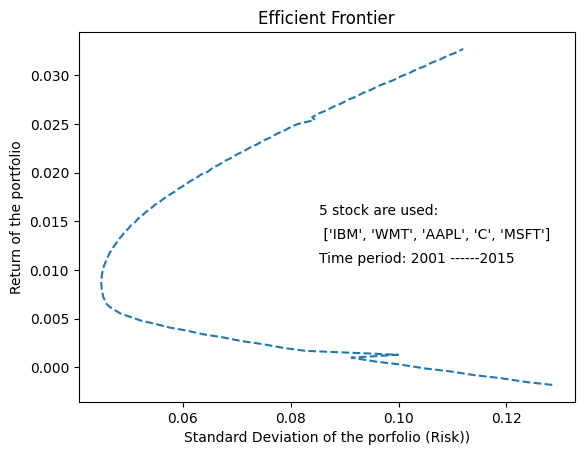

In [153]:
plt.title('Efficient Frontier')
plt.xlabel('Standard Deviation of the porfolio (Risk))')
plt.ylabel('Return of the portfolio')
plt.figtext(0.5,0.5,str(n_stock)+' stock are used: ')
plt.figtext(0.5,0.45,' '+str(stocks))
plt.figtext(0.5,0.4,'Time period: '+str(begYear)+' ------'+str(endYear))
plt.plot(out_std,out_mean,'--')
plt.show()

In [140]:
out_mean

[0.0352]